Imports

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
import numpy as np

Modify CSV for more features

In [ ]:
df = pd.read_csv('SP500.csv')
target_column = 4

# Shift the target column by -1 to get the next row's value
df['next_day_target'] = df.iloc[:, target_column].shift(-1)

# Create new columns for previous day's features
prev_day_columns = ['open', 'high', 'low', 'close', 'volume', 'change_percent']
for column in prev_day_columns:
    df[f'prev_day_{column}'] = df[column].shift(1)

# Create new columns for previous week's features
prev_week_columns = ['open', 'high', 'low', 'close', 'volume', 'change_percent']
for column in prev_week_columns:
    df[f'prev_week_{column}'] = df[column].shift(5)

# Create new columns for previous month's features
prev_month_columns = ['open', 'high', 'low', 'close', 'volume', 'change_percent']
for column in prev_month_columns:
    df[f'prev_month_{column}'] = df[column].shift(21)  # Assuming 21 trading days in a month

# Calculate trend percentage for previous week and previous month
df['prev_week_trend_percentage'] = (df['close'] - df['prev_week_close']) / df['prev_week_close'] * 100
df['prev_month_trend_percentage'] = (df['close'] - df['prev_month_close']) / df['prev_month_close'] * 100

# Calculate previous week's volatility
df['returns'] = df['close'].pct_change()
df['prev_week_volatility'] = df['returns'].rolling(window=5).std()

# Calculate previous month's volatility
df['prev_month_volatility'] = df['returns'].rolling(window=21).std()

# Drop rows with missing values
df = df.dropna()

# Save the modified DataFrame back to a CSV file
df.to_csv('modified_file.csv', index=False)

Read modified file

In [ ]:
# Read data
data = pd.read_csv('modified_file.csv')
X = data[['open', 'high', 'low', 'close', 'volume', 'change_percent',
          'prev_day_open', 'prev_day_high', 'prev_day_low', 'prev_day_close', 'prev_day_volume', 'prev_day_change_percent',
          'prev_week_open', 'prev_week_high', 'prev_week_low', 'prev_week_close', 'prev_week_volume', 'prev_week_change_percent',
          'prev_month_open', 'prev_month_high', 'prev_month_low', 'prev_month_close', 'prev_month_volume', 'prev_month_change_percent',
          'prev_week_trend_percentage', 'prev_month_trend_percentage',
          'prev_week_volatility', 'prev_month_volatility']]
y = data['next_day_target']  # Target variable
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Predicting next day with HistGradientBoostingRegressor

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

hgb_regressor = HistGradientBoostingRegressor(random_state=42)
hgb_regressor.fit(X_train, y_train)  # Train the model

y_pred = hgb_regressor.predict(X_test)  # Make predictions on the test set

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

future_data = pd.DataFrame({
    'open': [400.0],
    'high': [410.0],
    'low': [395.0],
    'close': [408.0],
    'volume': [100],
    'change_percent': [0.5],
    'prev_day_open': [399.0],
    'prev_day_high': [401.0],
    'prev_day_low': [397.0],
    'prev_day_close': [400.0],
    'prev_day_volume': [950000],
    'prev_day_change_percent': [0.3],
    'prev_week_open': [395.0],
    'prev_week_high': [402.0],
    'prev_week_low': [393.0],
    'prev_week_close': [398.0],
    'prev_week_volume': [900000],
    'prev_week_change_percent': [0.2],
    'prev_month_open': [380.0],
    'prev_month_high': [415.0],
    'prev_month_low': [375.0],
    'prev_month_close': [390.0],
    'prev_month_volume': [800000],
    'prev_month_change_percent': [1.0],
    'prev_week_trend_percentage': [2.5],
    'prev_month_trend_percentage': [4.6],
    'prev_week_volatility': [0.02],
    'prev_month_volatility': [0.03]
})

future_pred = hgb_regressor.predict(future_data)
print("Predicted next day stock price:", future_pred)

In [ ]:
# Load the modified dataset

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initializing and training the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = linear_regressor.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression - Mean Squared Error:", mse)
print("Linear Regression - R-squared:", r2)

# Preparing future data for prediction
future_data = pd.DataFrame({
    'open': [400.0],
    'high': [410.0],
    'low': [395.0],
    'close': [408.0],
    'volume': [1000000],
    'change_percent': [0.5],
    'prev_day_open': [399.0],
    'prev_day_high': [401.0],
    'prev_day_low': [397.0],
    'prev_day_close': [400.0],
    'prev_day_volume': [950000],
    'prev_day_change_percent': [0.3],
    'prev_week_open': [395.0],
    'prev_week_high': [402.0],
    'prev_week_low': [393.0],
    'prev_week_close': [398.0],
    'prev_week_volume': [900000],
    'prev_week_change_percent': [0.2],
    'prev_month_open': [380.0],
    'prev_month_high': [415.0],
    'prev_month_low': [375.0],
    'prev_month_close': [390.0],
    'prev_month_volume': [800000],
    'prev_month_change_percent': [1.0],
    'prev_week_trend_percentage': [2.5],
    'prev_month_trend_percentage': [4.6],
    'prev_week_volatility': [0.02],
    'prev_month_volatility': [0.03]
})

# Making predictions on future data
future_pred = linear_regressor.predict(future_data)
print("Linear Regression - Predicted next day stock price:", future_pred)
#New comment lol

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rff_model = RandomForestRegressor(random_state=42)
rff_model.fit(X_train, y_train)
y_pred = rff_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)

Epoch 1/5
604/604 [==============================] - 14s 16ms/step - loss: 0.1267 - val_loss: 0.0180
Epoch 2/5
604/604 [==============================] - 9s 14ms/step - loss: 0.0071 - val_loss: 0.0023
Epoch 3/5
604/604 [==============================] - 6s 9ms/step - loss: 0.0014 - val_loss: 7.8637e-04
Epoch 4/5
604/604 [==============================] - 5s 8ms/step - loss: 6.6402e-04 - val_loss: 3.2921e-04
Epoch 5/5
151/151 [==============================] - 1s 4ms/step
Train RMSE: 0.018684488880851037
Test RMSE: 0.018709322000580023


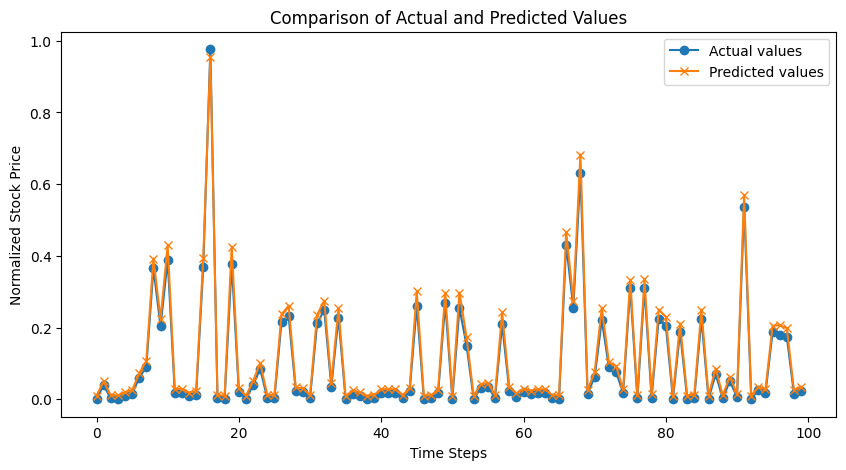

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


class StockPriceRNN(Model):
    def __init__(self, units=30, output_size=1):
        # Initialize the parent class
        super(StockPriceRNN, self).__init__()
        # First RNN layer with L2 regularization
        self.rnn1 = SimpleRNN(units, return_sequences=True, activation='tanh', kernel_regularizer=l2(0.01))
        # Dropout layer to prevent overfitting
        self.dropout1 = Dropout(0.3)
        # Second RNN layer
        self.rnn2 = SimpleRNN(units, return_sequences=False, activation='tanh', kernel_regularizer=l2(0.01))
        # Dense layer to produce output
        self.dense = Dense(output_size)


    def call(self, x):
        #Pass input through the first RNN layer
        x = self.rnn1(x)
        #Apply dropout
        x = self.dropout1(x)
        # Pass result through the second RNN layer
        x = self.rnn2(x)
        #Final output layer
        x = self.dense(x)
        return x

# Helper function to create input sequences from time series data
def create_dataset(data, time_step=1):
    X_data, Y_data = [], []
    # Create sequences
    for i in range(len(data) - time_step):
        a = data[i:(i + time_step), 0]  # Input sequence
        X_data.append(a)
        Y_data.append(data[i + time_step, 0])  # Corresponding output
    return np.array(X_data), np.array(Y_data)

# Extract close prices and reshape for compatibility
close_prices = X["close"].values.reshape(-1, 1)

# Scale data to a range of 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_normalized = scaler.fit_transform(close_prices)

# Generate sequences of close prices
time_step = 10
X_data, Y_data = create_dataset(close_prices_normalized, time_step)
X_data = X_data.reshape(X_data.shape[0], X_data.shape[1], 1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# Create an instance of the RNN model
model = StockPriceRNN(units=30, output_size=1)
optimizer = Adam(learning_rate=0.001)
# Compile model specifying optimizer and loss function
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model with training data and validate with test data
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions on the training data
train_predict = model.predict(X_train)
train_predict = train_predict.squeeze()  # Remove single-dimensional entries from shape

# Make predictions on the test data
test_predict = model.predict(X_test)
test_predict = test_predict.squeeze()

# Calculate Mean Squared Error for training data
if y_train.shape == train_predict.shape:
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
    print(f'Train RMSE: {train_rmse}')
else:
    print("Mismatch in sample sizes between training predictions and actuals.")
    print(f"Training actuals shape: {y_train.shape}, Training predictions shape: {train_predict.shape}")

# Calculate Mean Squared Error for test data if applicable
if y_test.shape == test_predict.shape:
    test_mse = np.sqrt(mean_squared_error(y_test, test_predict))
    print(f'Test RMSE: {test_mse}')
    # Plot the first n data points to compare predictions with actual values
    plt.figure(figsize=(10, 5))
    plt.plot(y_test[:100], label='Actual values', marker='o')
    plt.plot(test_predict[:100], label='Predicted values', marker='x')
    plt.title('Comparison of Actual and Predicted Values')
    plt.xlabel('Time Steps')
    plt.ylabel('Normalized Stock Price')
    plt.legend()
    plt.show()
else:
    print("Mismatch in sample sizes between testing predictions and actuals.")
    print(f"Testing actuals shape: {y_test.shape}, Testing predictions shape: {test_predict.shape}")


In [ ]:
# Extract the last sequence from the data
last_sequence = close_prices_normalized[-time_step:].reshape(1, time_step, 1)

# Predict the next day's price
next_day_prediction = model.predict(last_sequence)

# Rescale the prediction to its original scale
next_day_prediction = scaler.inverse_transform(next_day_prediction)

print("Predicted next day's price:", next_day_prediction)


1/1 [==============================] - 0s 83ms/step
Predicted next day's price: [[5169.7344]]
